In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

In [60]:
x = np.arange(1, 2, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
#
# ax.scatter(dataX, dataY, data_labels, c=rgb)
#
# plt.show()

<H1>Utworzenie funkcji przynależności</H1>

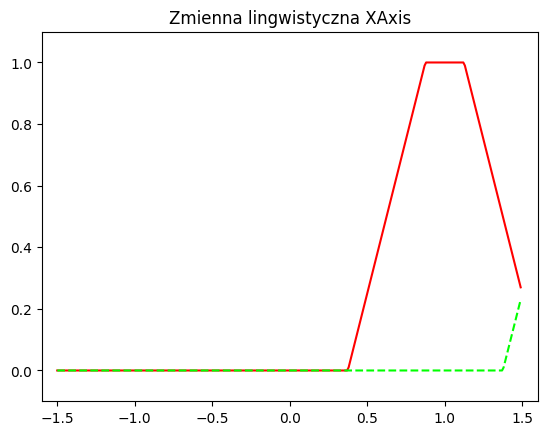

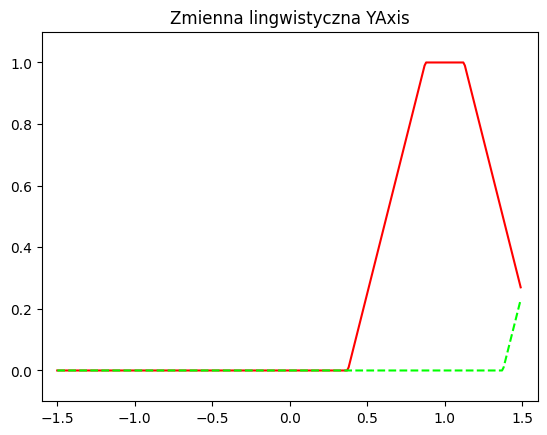

In [61]:
# varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
# varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])
#Wyświetlanie funkcji przynależnosci
# plt.figure()
varX.show()
# plt.legend()

plt.figure()
varY.show()
# plt.legend()
plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.7887195  0.98240903 0.79829662]
 [0.49194343 0.68610026 0.89432828]
 [0.29836263 0.06076122 0.07028325]
 [0.65863118 0.19647889 0.30844903]]


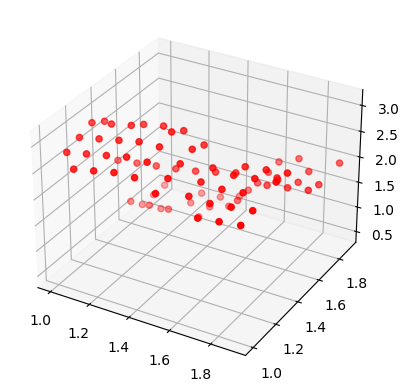

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   2.5588237595386154
Liczba ew:  66810
Liczba it:  50
TIME elapsed:  19.078185081481934


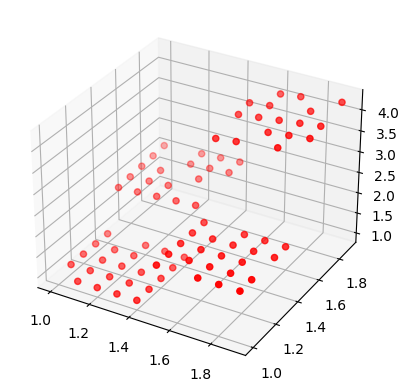

In [63]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

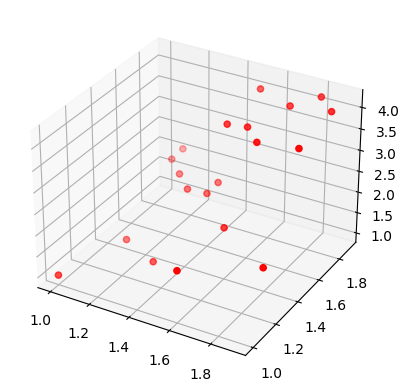

[[3 0 0]
 [0 9 0]
 [0 0 8]]


In [64]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

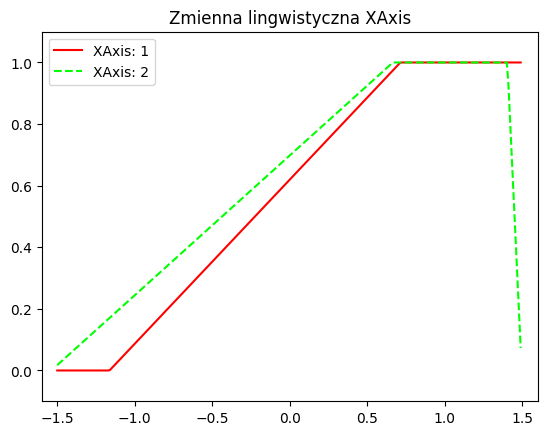

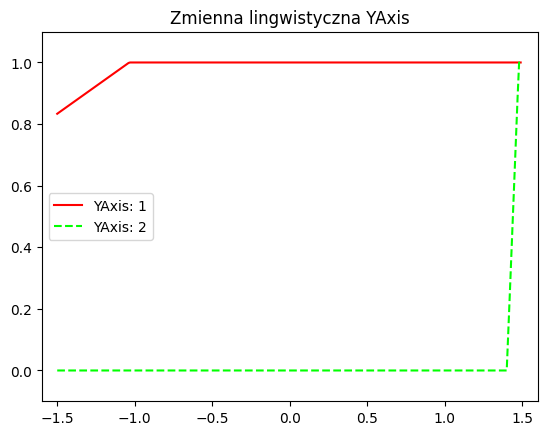

In [70]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [71]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[[1.64810855e+00, 1.86818765e+00, 1.87661827e+00, 3.70229209e+00],
        [1.03495311e+00, 7.38775707e-01, 2.20374810e+00, 9.23637356e-02]],

       [[7.51795223e-01, 3.57471238e+00, 2.79000968e+00, 1.21268331e+00],
        [2.16859730e+00, 1.37920270e+00, 7.85497655e-02, 4.25945183e-17]]]) 
Konkluzje:  array([[4.84075125e-12, 4.48818342e-11, 2.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.78450206e-11],
       [1.17647053e+00, 1.17647064e+00, 2.00000000e+00],
       [5.30649790e-12, 0.00000000e+00, 7.05881455e-01]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

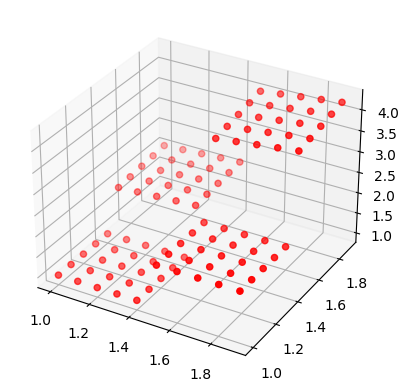

In [72]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [73]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

SyntaxError: invalid syntax (2678942874.py, line 1)

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [74]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000002E2E0D92590>


In [75]:
%matplotlib inline

In [81]:
x = np.arange(1, 5, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

In [82]:
mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[3.96060185e-01 9.45739471e-01 2.41289265e-01]
 [6.61867064e-04 1.30915352e-01 7.95036743e-01]
 [1.73658928e-02 2.91739219e-01 4.31121414e-01]
 [3.67462597e-03 3.73067903e-01 4.70642849e-01]
 [5.50731501e-01 1.59649626e-01 1.38663383e-01]
 [4.71971754e-01 4.48623101e-01 7.71188974e-01]
 [7.66209773e-01 6.13566311e-01 1.67321724e-01]
 [1.37571836e-01 6.59784394e-01 2.50860452e-01]
 [6.33419340e-01 8.48115195e-01 5.44569640e-01]
 [2.49092933e-01 7.89782402e-01 9.21833281e-01]
 [7.77823688e-01 5.97655843e-01 7.54398152e-01]
 [4.26567900e-01 9.83377946e-01 2.80822462e-01]
 [1.58385549e-01 4.99755239e-03 9.16695402e-01]
 [6.19613486e-01 9.40529835e-01 5.27714779e-01]
 [2.11488770e-01 8.71091928e-01 6.58137878e-01]
 [1.00372540e-02 

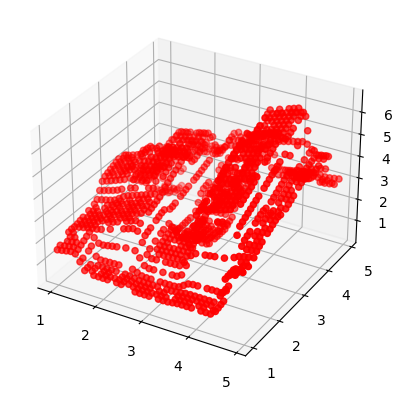

In [83]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   688.5641507667295
Liczba ew:  416744
Liczba it:  50
TIME elapsed:  413.11730003356934


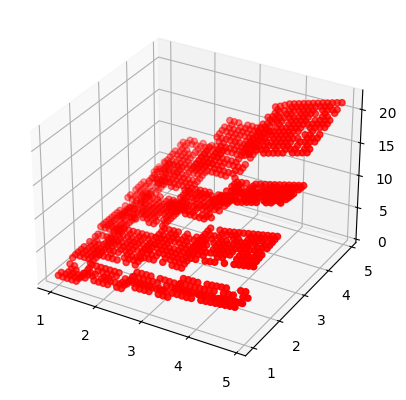

In [84]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

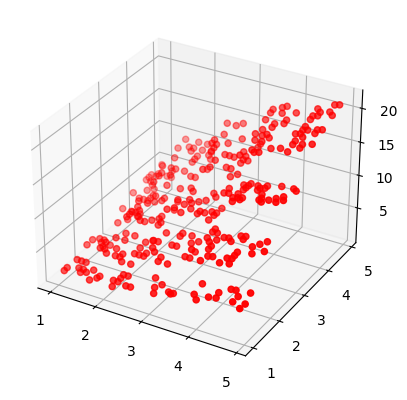

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 36  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 25 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17 25  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 13  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  9  4  2  0  0  0]
 [ 0  0  0

In [87]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [88]:
mf1 = {"1": [1, 0.25, 0.5, 0.5],
       "2": [2, 0.25, 0.5, 0.5],
       "3": [3, 0.25, 0.5, 0.5],
       "4": [4, 0.25, 0.5, 0.5],
       "5": [5, 0.25, 0.5, 0.5],
}

times = []
confusion_matrices = []

for test in range(2, 6):
    x = np.arange(1, test, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.zeros(shape=(len(dataX)))

    for sample in range(len(dataX)):
        data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

    varX = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])
    varY = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    fis.train(True, True, False, True, n_iter=50)
    end = time.time()

    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = list(map(round,y_pred.flatten()))

    times.append(end - start)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   1.5294196249580199
Liczba ew:  84966
Liczba it:  50


C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   14.644049808993795
Liczba ew:  219726
Liczba it:  50


C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   96.81317940226991
Liczba ew:  366200
Liczba it:  50


C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   608.290694523391
Liczba ew:  408879
Liczba it:  50


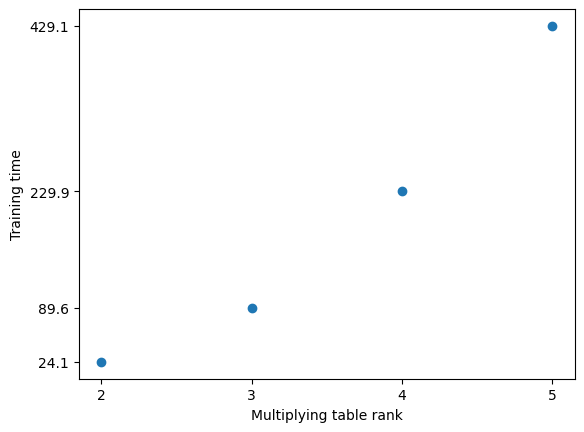

In [94]:
plt.scatter([2, 3, 4, 5], times)
plt.xlabel('Multiplying table rank')
plt.xticks([2,3,4,5])
plt.ylabel('Training time')
plt.yticks(times)
plt.show()